In [1]:
import numpy as np
# import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import sys
from sklearn.model_selection import ParameterGrid
import gzip
import matplotlib.pyplot as plt
import torch
from torch_geometric.data import Data
import networkx as nx
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree

In [2]:
Z=3 #latent period
Zb=1 #scale parameter for Z
D=5 #infectious period
Db=1 #scale parameter for b

In [26]:
x=np.linspace(0,20,1000)
latency_p = SSA.gamma.pdf(x, a=Z, scale=Zb)

infectious_p = SSA.gamma.pdf(x, a=D, scale=Db)
# v = rng.random(z_num)
# delay_days = latency_p+v*infectious_p 

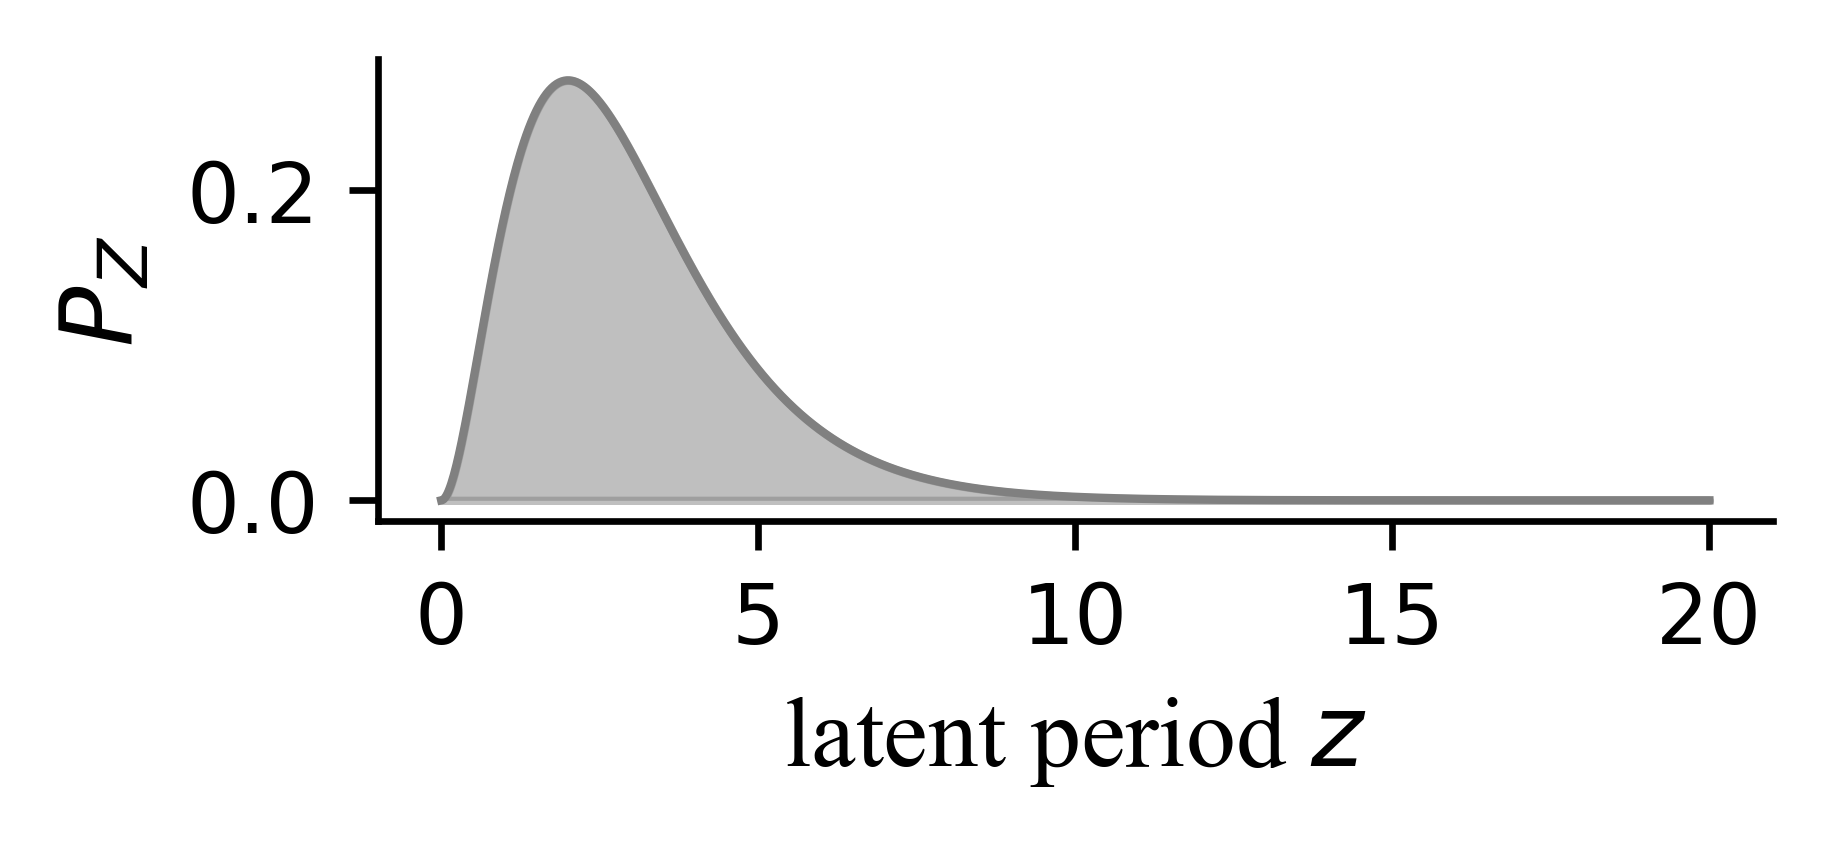

In [34]:
plt.figure(dpi=600,figsize=(3,1))
plt.plot(x,latency_p,color='gray',lw=1) 
plt.fill_between(x, latency_p, color='gray', alpha=0.5)
plt.xlabel(r'latent period $z$',fontdict={'family': 'Times New Roman', 'size': 12})
plt.ylabel(r'$P_{Z}$',fontdict={'family': 'Times New Roman', 'size': 12})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the figure with a transparent background
plt.savefig('latency.svg', transparent=True)
# plt.show()

In [51]:
z_num = 200000
latency_p = SSA.gamma.rvs(a=Z, scale=Zb, size=z_num)
infectious_p = SSA.gamma.rvs(a=D, scale=Db, size=z_num)
v = np.random.random(z_num)
delay_days = latency_p+v*infectious_p  # 3+5*0.5

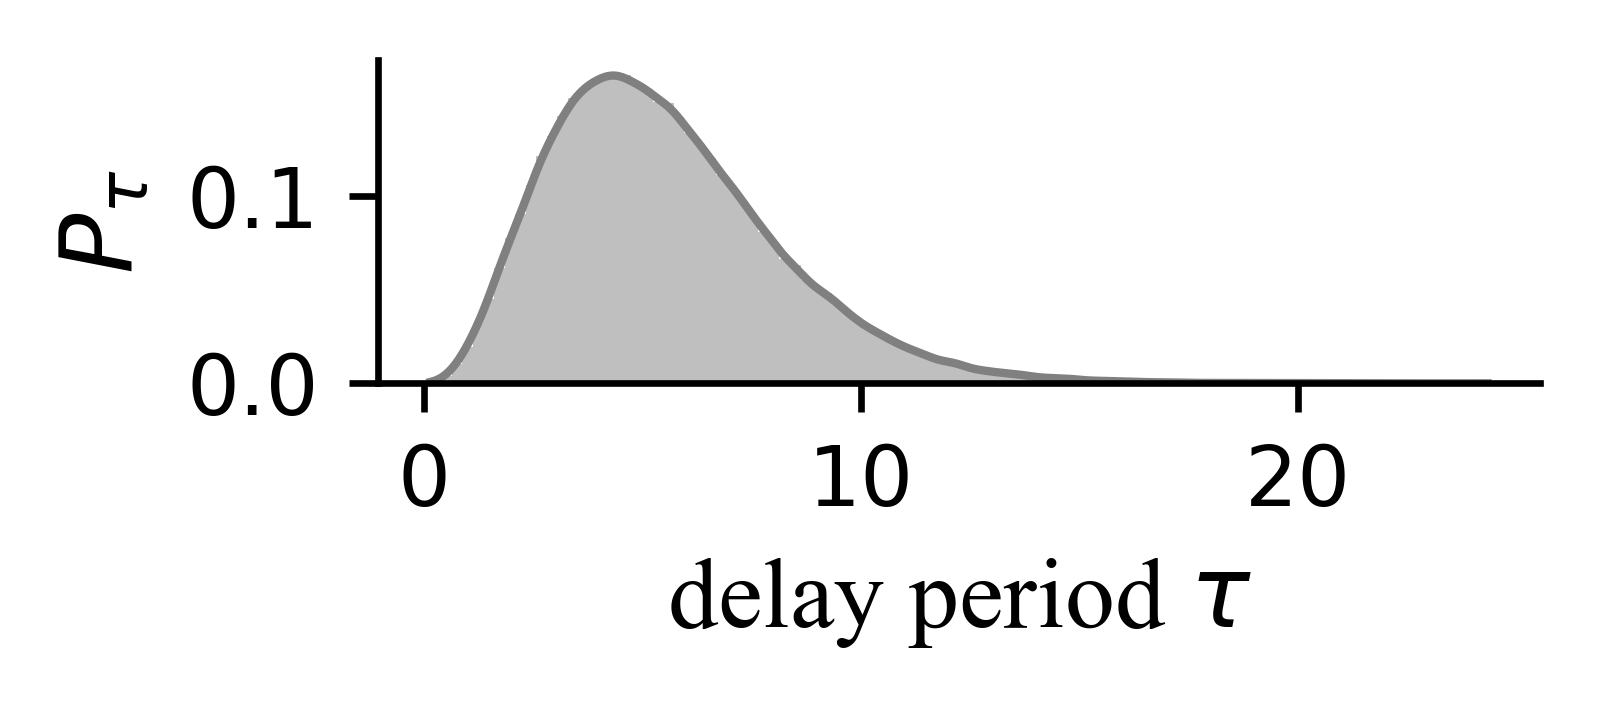

In [59]:
from scipy.stats import gaussian_kde

plt.figure(dpi=600, figsize=(2.5, 0.7))

plt.hist(delay_days,bins=100,density=True,alpha=0.5, color='gray')
kde = gaussian_kde(delay_days)
x_grid = np.linspace(min(delay_days), max(delay_days), 1000)
plt.plot(x_grid, kde.evaluate(x_grid), color='gray',lw=1)

plt.xlabel(r'delay period $\tau$', fontdict={'family': 'Times New Roman', 'size': 12})
plt.ylabel(r'$P_{\tau}$', fontdict={'family': 'Times New Roman', 'size': 12})

# Turn off the upper and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('delay.svg', transparent=True)
# plt.show()